<a href="https://colab.research.google.com/github/RajaKrishnaNandhiniR/IBM-Project-1392-1658386621/blob/main/ProjectPhase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Downsample.ipynb

import cv2
import os
from pathlib import Path

def extract_frames(video_path, output_dir, target_fps=30):
    cap = cv2.VideoCapture(video_path)
    original_fps = cap.get(cv2.CAP_PROP_FPS)
    interval = int(round(original_fps / target_fps))
    count = 0
    saved = 0

    os.makedirs(output_dir, exist_ok=True)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if count % interval == 0:
            frame_filename = os.path.join(output_dir, f"frame_{saved:05d}.jpg")
            cv2.imwrite(frame_filename, frame)
            saved += 1
        count += 1

    cap.release()
    print(f"Saved {saved} frames to {output_dir}")

# Example usage:
video_folder = "/content/Videos"
output_folder = "/content/extracted_frames"

for video_file in os.listdir(video_folder):
    if video_file.endswith(".mp4"):
        video_path = os.path.join(video_folder, video_file)
        subject_id = Path(video_file).stem
        subject_output_dir = os.path.join(output_folder, subject_id)
        extract_frames(video_path, subject_output_dir, target_fps=30)


Saved 3598 frames to /content/extracted_frames/PDFE01_1
Saved 3688 frames to /content/extracted_frames/PDFE02_1
Saved 3675 frames to /content/extracted_frames/PDFE01_2
Saved 3630 frames to /content/extracted_frames/PDFE03_1
Saved 3635 frames to /content/extracted_frames/PDFE03_2


In [4]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.7 which is incompatib

In [6]:
!pip install --upgrade numpy
!pip install --upgrade tensorflow
!pip install --upgrade scipy
!pip install --upgrade mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 18.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.3 MB/s e

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you h

In [1]:
import cv2
import mediapipe as mp
import os
import numpy as np

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2)

input_root = "extracted_frames"
output_root = "mediapipe_keypoints"
os.makedirs(output_root, exist_ok=True)

subjects = sorted(os.listdir(input_root))

for subject in subjects:
    subj_path = os.path.join(input_root, subject)
    save_path = os.path.join(output_root, subject)
    os.makedirs(save_path, exist_ok=True)

    for img_file in sorted(os.listdir(subj_path)):
        img_path = os.path.join(subj_path, img_file)
        image = cv2.imread(img_path)

        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            keypoints = np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in landmarks])  # (33, 4)

            # Save as .npy file
            frame_id = os.path.splitext(img_file)[0]
            np.save(os.path.join(save_path, f"{frame_id}.npy"), keypoints)


In [2]:
pip install opencv-python


In [9]:
import cv2
import mediapipe as mp
import numpy as np
import json
import os

# Initialize MediaPipe
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, model_complexity=2, min_detection_confidence=0.5)

def normalize_landmarks(landmarks):
    if len(landmarks) < 33:
        return None

    left_hip = np.array([landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y])
    right_hip = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                          landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y])
    mid_hip = (left_hip + right_hip) / 2

    left_ankle = np.array([landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                           landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y])
    right_ankle = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,
                            landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y])
    mid_ankle = (left_ankle + right_ankle) / 2

    scale = np.linalg.norm(mid_hip - mid_ankle)
    if scale < 1e-6:
        return None

    norm_landmarks = []
    for lm in landmarks:
        norm_x = (lm.x - mid_hip[0]) / scale
        norm_y = (lm.y - mid_hip[1]) / scale
        norm_z = lm.z / scale  # optional Z coordinate
        norm_landmarks.append([norm_x, norm_y, norm_z])

    return norm_landmarks

def process_video(video_path, output_json_path):
    cap = cv2.VideoCapture(video_path)
    frame_id = 0
    results_dict = {}

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = pose.process(frame_rgb)

        if result.pose_landmarks:
            normalized = normalize_landmarks(result.pose_landmarks.landmark)
            if normalized:
                results_dict[frame_id] = normalized

        frame_id += 1

    cap.release()

    # Save JSON output
    with open(output_json_path, 'w') as f:
        json.dump(results_dict, f)

    print(f"✅ Saved: {output_json_path}")

# === Batch processing all videos ===

video_dir = "/content/Videos"
output_dir = "normalized_keypoints"
os.makedirs(output_dir, exist_ok=True)

for vid in os.listdir(video_dir):
    if vid.endswith(".mp4"):
        in_path = os.path.join(video_dir, vid)
        out_path = os.path.join(output_dir, vid.replace(".mp4", ".json"))
        process_video(in_path, out_path)


✅ Saved: normalized_keypoints/PDFE01_1.json
✅ Saved: normalized_keypoints/PDFE02_1.json
✅ Saved: normalized_keypoints/PDFE01_2.json
✅ Saved: normalized_keypoints/PDFE03_1.json
✅ Saved: normalized_keypoints/PDFE03_2.json


In [22]:
def load_annotations_from_txt(txt_file_path, threshold=1.0):
    annotations = []
    start_frame = None

    with open(txt_file_path, 'r') as f:
        # Skip the first header line (containing column names)
        header = f.readline().strip()

        # Process the rest of the lines
        for line in f:
            line = line.strip()

            # Skip lines that might still contain headers
            if line.startswith("Frame #"):
                continue

            # Split the line into columns by whitespace
            columns = line.split()

            # Ensure there are enough columns to avoid index errors
            if len(columns) > 8:
                try:
                    # Extract the freezing event flag (assuming it's the 8th column)
                    freezing_event_flag = float(columns[7])  # Treat as float to handle the number format

                    # Print out the entire line and relevant parts for debugging
                    print(f"Line: {line}")  # Show the entire line
                    print(f"Freezing event flag: {freezing_event_flag}")  # Show the freezing event flag

                    # Extract the frame number from the first column
                    frame_number = int(columns[0])  # This is the frame number directly

                    # Check if the freezing event flag is above the threshold
                    if freezing_event_flag >= threshold and start_frame is None:
                        start_frame = frame_number  # Set the start of the freezing event
                        print(f"Start frame detected: {start_frame}")

                    # Look for end of a freezing event (when flag drops below threshold)
                    elif freezing_event_flag < threshold and start_frame is not None:
                        end_frame = frame_number  # Set the end of the freezing event
                        annotations.append({"start": start_frame, "end": end_frame})
                        print(f"End frame detected: {end_frame}")
                        start_frame = None  # Reset start_frame for the next event

                except ValueError as e:
                    # Handle invalid freezing event flags or other issues gracefully
                    print(f"Skipping line due to error: {e}")
                    continue

    return annotations

# Example usage
annotations_file_txt = '/content/IMU/SUB03_2.txt'  # Path to your specific TXT file
annotations = load_annotations_from_txt(annotations_file_txt)

# Print loaded annotations
print("Annotations:", annotations)


Line: 1	0.0078125	0.136159101951238	-0.305077118820371	1.18159026498629	-15.472065243621	-34.3611179662476	-6.90090035882112	0
Freezing event flag: -6.90090035882112
Line: 2	0.015625	0.236753560237992	-0.337138436373599	1.18705991476228	-18.6588615874	-39.1707556644778	-5.73459166666825	0
Freezing event flag: -5.73459166666825
Line: 3	0.0234375	0.264320233066003	-0.35953144149868	1.17903982539816	-18.7403771218203	-42.6108852962614	1.43430045820378	0
Freezing event flag: 1.43430045820378
Start frame detected: 3
Line: 4	0.03125	0.327986607774308	-0.35272807734257	1.24481525128674	-14.3005229926932	-52.1670784102475	17.9666859066257	0
Freezing event flag: 17.9666859066257
Line: 5	0.0390625	0.30470645122669	-0.304311415396951	1.39468303749662	-8.91000567620789	-62.6199223668785	40.2276294677297	0
Freezing event flag: 40.2276294677297
Line: 6	0.046875	0.239170909421155	0.00397565206148574	1.41261773973957	-5.20578617042743	-67.9818285391578	53.9465876904688	0
Freezing event flag: 53.946587

In [24]:
import os
import pandas as pd

imu_folder = '/content/IMU'  # your path
imu_files = sorted([f for f in os.listdir(imu_folder) if f.endswith('.txt')])

# Let's load one file first, say SUB03_2.txt
file_path = os.path.join(imu_folder, 'SUB03_2.txt')

# Read the data, skipping the header row
df = pd.read_csv(file_path, sep='\t', skiprows=1)

# Rename columns for ease if needed (depends on actual file format)
df.columns = ['Frame', 'Time', 'ACC_ML', 'ACC_AP', 'ACC_SI',
              'GYR_ML', 'GYR_AP', 'GYR_SI', 'FOG']


In [25]:
from scipy.signal import savgol_filter

# Apply smoothing (window length must be odd, polyorder < window_length)
df['ACC_ML_smooth'] = savgol_filter(df['ACC_ML'], window_length=21, polyorder=3)
df['GYR_ML_smooth'] = savgol_filter(df['GYR_ML'], window_length=21, polyorder=3)
# Repeat for others if needed


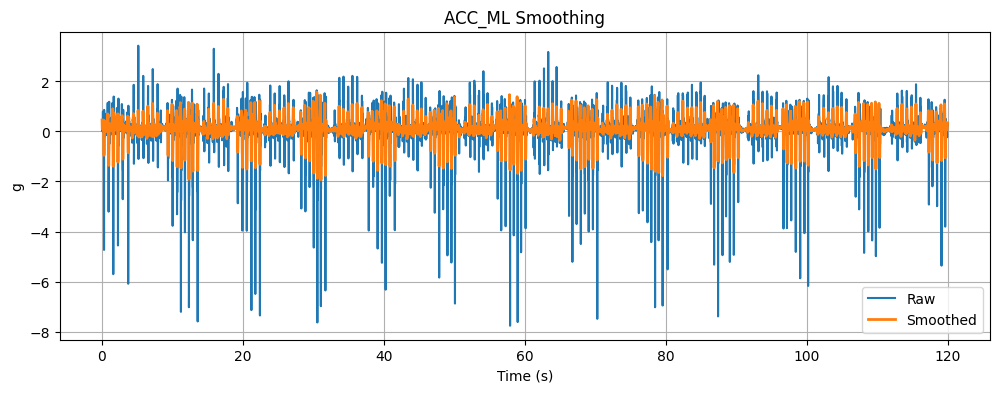

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(df['Time'], df['ACC_ML'], label='Raw')
plt.plot(df['Time'], df['ACC_ML_smooth'], label='Smoothed', linewidth=2)
plt.title('ACC_ML Smoothing')
plt.xlabel('Time (s)')
plt.ylabel('g')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
for file_name in imu_files:
    path = os.path.join(imu_folder, file_name)
    df = pd.read_csv(path, sep='\t', skiprows=1)
    df.columns = ['Frame', 'Time', 'ACC_ML', 'ACC_AP', 'ACC_SI',
                  'GYR_ML', 'GYR_AP', 'GYR_SI', 'FOG']

    df['ACC_ML_smooth'] = savgol_filter(df['ACC_ML'], window_length=21, polyorder=3)
    df['GYR_ML_smooth'] = savgol_filter(df['GYR_ML'], window_length=21, polyorder=3)

    # Save or process further as needed


In [28]:
import os
import pandas as pd
from scipy.signal import savgol_filter

imu_folder = '/content/IMU'
output_folder = '/content/Smoothed_IMU'
os.makedirs(output_folder, exist_ok=True)

imu_files = sorted([f for f in os.listdir(imu_folder) if f.endswith('.txt')])

for file_name in imu_files:
    input_path = os.path.join(imu_folder, file_name)
    df = pd.read_csv(input_path, sep='\t', skiprows=1)

    # Set proper column names
    df.columns = ['Frame', 'Time', 'ACC_ML', 'ACC_AP', 'ACC_SI',
                  'GYR_ML', 'GYR_AP', 'GYR_SI', 'FOG']

    # Apply smoothing
    df['ACC_ML_smooth'] = savgol_filter(df['ACC_ML'], window_length=21, polyorder=3)
    df['ACC_AP_smooth'] = savgol_filter(df['ACC_AP'], window_length=21, polyorder=3)
    df['ACC_SI_smooth'] = savgol_filter(df['ACC_SI'], window_length=21, polyorder=3)

    df['GYR_ML_smooth'] = savgol_filter(df['GYR_ML'], window_length=21, polyorder=3)
    df['GYR_AP_smooth'] = savgol_filter(df['GYR_AP'], window_length=21, polyorder=3)
    df['GYR_SI_smooth'] = savgol_filter(df['GYR_SI'], window_length=21, polyorder=3)

    # Save to CSV
    output_path = os.path.join(output_folder, file_name.replace('.txt', '_smooth.csv'))
    df.to_csv(output_path, index=False)

    print(f"✅ Saved: {output_path}")


✅ Saved: /content/Smoothed_IMU/SUB01_1_smooth.csv
✅ Saved: /content/Smoothed_IMU/SUB01_2_smooth.csv
✅ Saved: /content/Smoothed_IMU/SUB02_1_smooth.csv
✅ Saved: /content/Smoothed_IMU/SUB03_1_smooth.csv
✅ Saved: /content/Smoothed_IMU/SUB03_2_smooth.csv


In [29]:
import cv2

video_path = '/content/Videos/PDFE03_2.mp4'  # adjust as needed
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count / fps
print(f"FPS: {fps}, Total frames: {frame_count}, Duration (s): {duration}")
cap.release()


FPS: 29.97827708889899, Total frames: 3635, Duration (s): 121.25446666666667


In [34]:
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Failed to open video!")
else:
    print("Video loaded successfully.")


Failed to open video!


In [33]:
import cv2
import os

video_path = '/content/Videos/SUB03_2.mp4'
output_dir = '/content/Extracted_Frames/SUB03_2'
os.makedirs(output_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)

frame_number = 0  # 👈 YOU NEED THIS

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Save every 5th frame
    if frame_number % 5 == 0:
        frame_filename = os.path.join(output_dir, f'frame_{frame_number:04d}.jpg')
        cv2.imwrite(frame_filename, frame)

    frame_number += 1  # 👈 Increment frame count

cap.release()
print(f"Extracted {frame_number // 5} frames to {output_dir}")


Extracted 0 frames to /content/Extracted_Frames/SUB03_2


In [31]:
import pandas as pd

imu_path = '/content/Smoothed_IMU/SUB03_2_smooth.csv'
imu_df = pd.read_csv(imu_path)

# Truncate to match 3500 frames
imu_df = imu_df.iloc[:3500]
print(imu_df.shape)


(3500, 15)


In [32]:
import pandas as pd
from scipy.signal import resample

# Load IMU data
imu_path = '/content/Smoothed_IMU/SUB03_2_smooth.csv'
imu_df = pd.read_csv(imu_path)

# Target number of samples (video frames)
target_len = 3635  # number of video frames

# Resample IMU dataframe to match video frame count
imu_resampled = pd.DataFrame(resample(imu_df.values, target_len), columns=imu_df.columns)

# Save aligned IMU
imu_resampled.to_csv('/content/Aligned_IMU/SUB03_2_aligned.csv', index=False)

print(f"Original IMU: {imu_df.shape}, Resampled IMU: {imu_resampled.shape}")


OSError: Cannot save file into a non-existent directory: '/content/Aligned_IMU'